In [3]:
events_file_path = "./event_data/Sündmused_2011-2015_Marek.xlsx"
cached_events_file_path = "./Cache/events.csv"

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import seaborn as sns; sns.set(color_codes=True)
from datetime import datetime

import os, sys
lib_path = os.path.abspath(os.path.join('.', 'py'))
sys.path.append(lib_path)

import rescue_events as re

## 1. Loading & cleaning Data

In [4]:
events = re.load(events_file_path, cached_events_file_path)

Loading Data
Data Loaded!
110478 events loaded
9814 rows have missing datetime - removing



## Plotting data

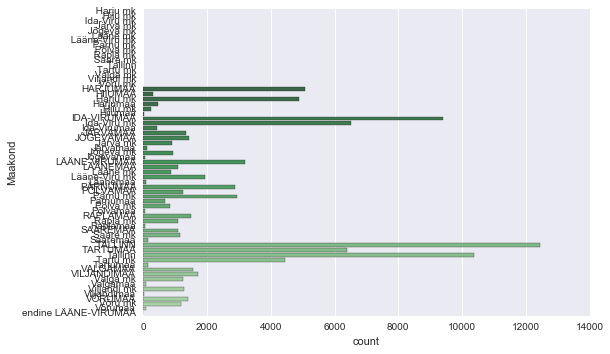

In [5]:
sns.countplot(y="Maakond", data=events, palette="Greens_d");

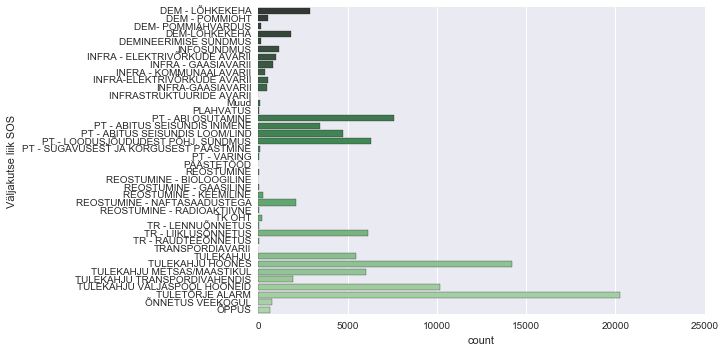

In [6]:
sns.countplot(y="Väljakutse liik SOS", data=events, palette="Greens_d");

In [7]:
#Filtered events without missing "Aeg" values
events_f = events[events.Aeg.notnull()]

c:\users\markl\appdata\local\programs\python\python35\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


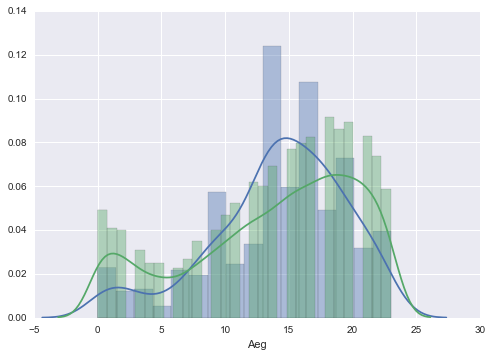

In [8]:
is_on_water =  events_f["Väljakutse liik SOS"]=="ÕNNETUS VEEKOGUL"
is_building_on_fire =  events_f["Väljakutse liik SOS"]=="TULEKAHJU HOONES"
sns.distplot(events_f[is_on_water]["Aeg"].dt.hour);
sns.distplot(events_f[is_building_on_fire]["Aeg"].dt.hour);

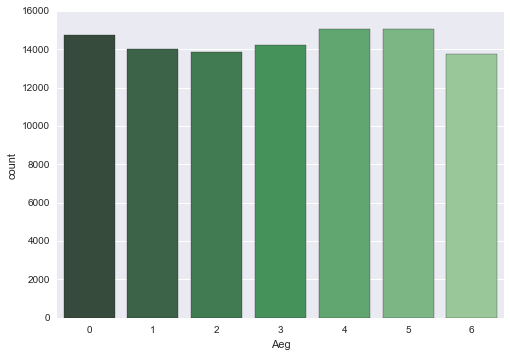

In [9]:
sns.countplot(x=events["Aeg"].dt.dayofweek, palette="Greens_d");

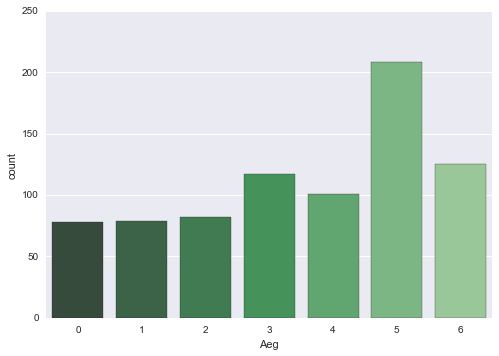

In [10]:
sns.countplot(x=events_f[is_on_water]["Aeg"].dt.dayofweek, palette="Greens_d");

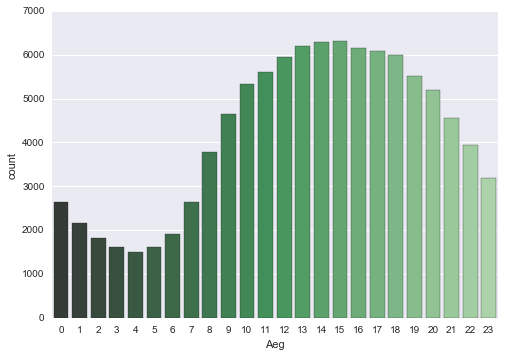

In [11]:
sns.countplot(x=events["Aeg"].dt.hour, palette="Greens_d");

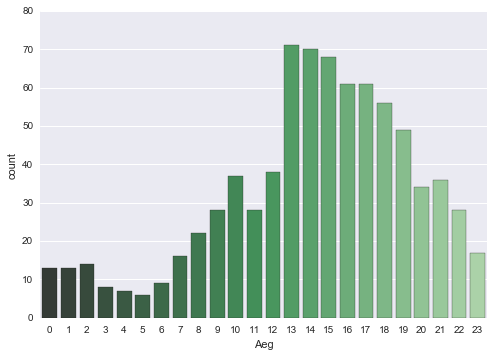

In [12]:
sns.countplot(x=events_f[is_on_water]["Aeg"].dt.hour, palette="Greens_d");

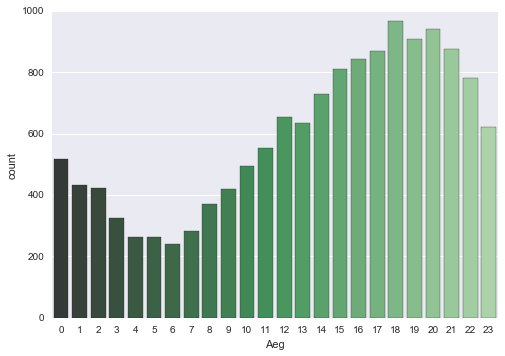

In [13]:
sns.countplot(x=events_f[is_building_on_fire]["Aeg"].dt.hour, palette="Greens_d");

In [14]:
hours = pd.date_range(start=events.Aeg.min().date(), end=events.Aeg.max(),  freq='H')
days  = pd.date_range(start=events.Aeg.min().date(), end=events.Aeg.max(),  freq='D')

between_start_stop = lambda row: ((events.Aeg>=row.start) & (events.Aeg<row.stop)).sum()

hourly_count = pd.DataFrame({"start":hours, "stop":hours+pd.np.timedelta64(1,'h')}).apply(between_start_stop, axis=1)
daily_count  = pd.DataFrame({"start":days,  "stop":days +pd.np.timedelta64(1,'D')}).apply(between_start_stop, axis=1)

In [13]:
weeks = pd.date_range(start=events.Aeg.min().date(), end=events.Aeg.max(),  freq='w')
weekly_count = pd.DataFrame({"start":weeks, "stop":weeks+pd.np.timedelta64(1,'h')}).apply(between_start_stop, axis=1)

(0.0, 0.5)

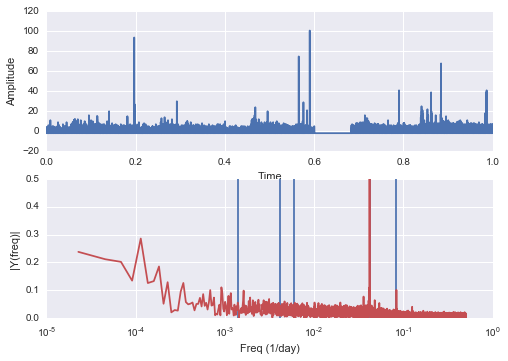

In [14]:
import numpy as np

Fs = 1;  # sampling rate
Ts = 1.0/Fs; # sampling interval


y= hourly_count-hourly_count.mean()
t = np.arange(0,1,1/len(y)) # time vector

n = len(y) # length of the signal
k = np.arange(n)
T = n/Fs
frq = k/T # two sides frequency range
frq = frq[range(n//2)] # one side frequency range

Y = np.fft.fft(y)/n # fft computing and normalization
Y = Y[range(n//2)]

fig, ax = plt.subplots(2, 1)
ax[0].plot(t,y)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[1].axvline(1/12)
ax[1].axvline(1/24)
ax[1].axvline(1/(24*10))
ax[1].axvline(1/(24*7))
ax[1].axvline(1/(24*30))
ax[1].semilogx(frq,abs(Y),'r') # plotting the spectrum
ax[1].set_xlabel('Freq (1/day)')
ax[1].set_ylabel('|Y(freq)|')
plt.ylim(0.0,0.5)


In [15]:
hourly_ts = pd.DataFrame(index=hours, data={"count":hourly_count.values})
daily_ts = pd.DataFrame(index=days, data={"count":daily_count.values})
weekly_ts = pd.DataFrame(index=weeks, data={"count":weekly_count.values})

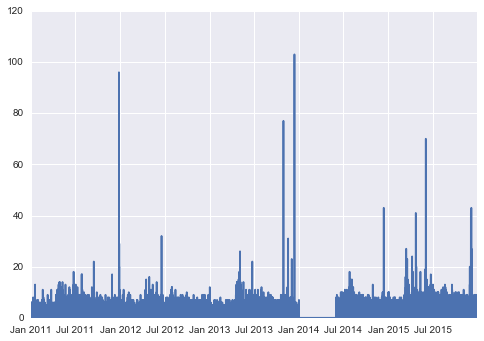

In [16]:
plt.plot(hourly_ts)

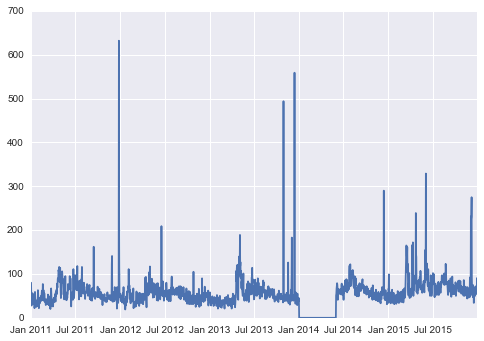

In [17]:
plt.plot(daily_ts)

c:\users\markl\appdata\local\programs\python\python35\lib\site-packages\statsmodels\tsa\filters\filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


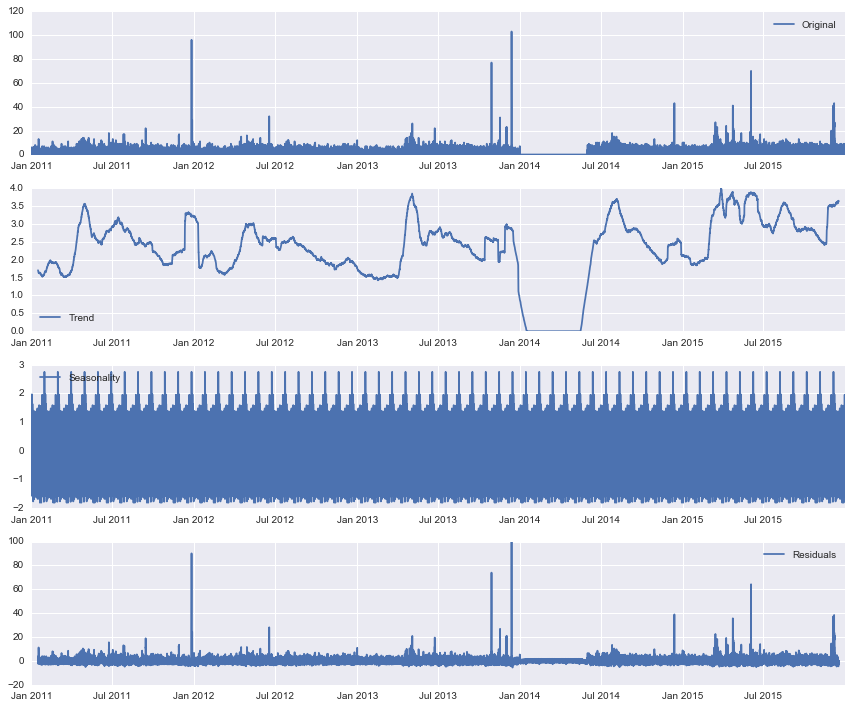

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(hourly_ts.values, freq=24*int(365/12))

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure( figsize=(12,10))
ax = plt.subplot(411)
plt.plot(hourly_ts, label='Original')
plt.legend(loc='best')
plt.subplot(412, sharex=ax)
plt.plot(hourly_ts.index, trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413, sharex=ax)
plt.plot(hourly_ts.index, seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414, sharex=ax)
plt.plot(hourly_ts.index, residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

c:\users\markl\appdata\local\programs\python\python35\lib\site-packages\statsmodels\tsa\filters\filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


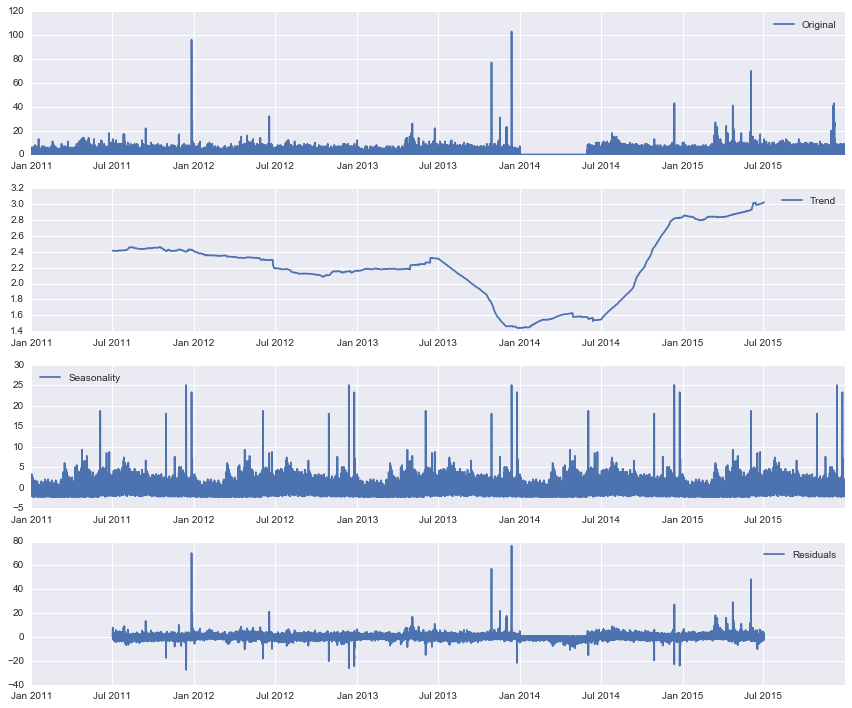

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(hourly_ts.values, freq=24*365)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure( figsize=(12,10))
ax = plt.subplot(411)
plt.plot(hourly_ts, label='Original')
plt.legend(loc='best')
plt.subplot(412, sharex=ax)
plt.plot(hourly_ts.index, trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413, sharex=ax)
plt.plot(hourly_ts.index, seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414, sharex=ax)
plt.plot(hourly_ts.index, residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

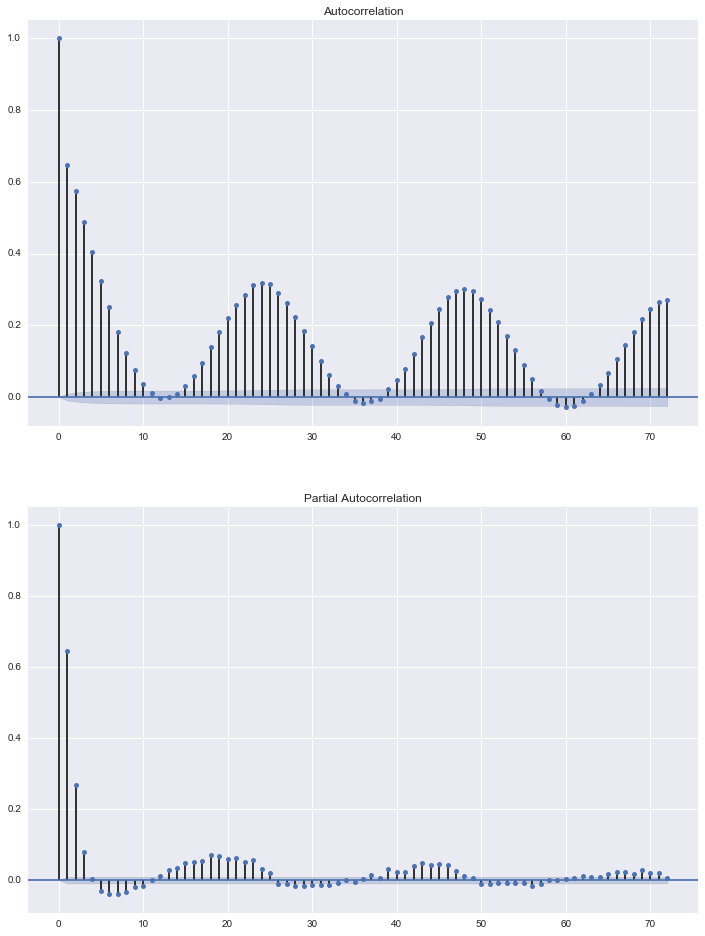

In [20]:
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
import statsmodels.api as sm

lags=24*3


fig = plt.figure(figsize=(12,16))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(hourly_ts, lags=lags, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(hourly_ts, lags=lags, ax=ax2)

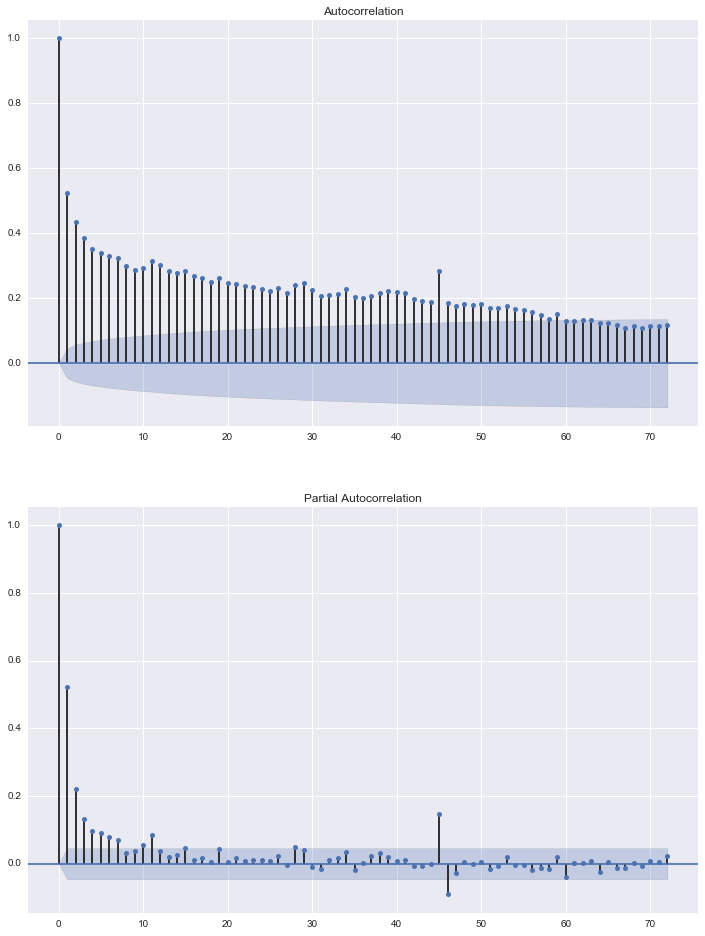

In [21]:
fig = plt.figure(figsize=(12,16))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(daily_ts, lags=lags, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(daily_ts, lags=lags, ax=ax2)

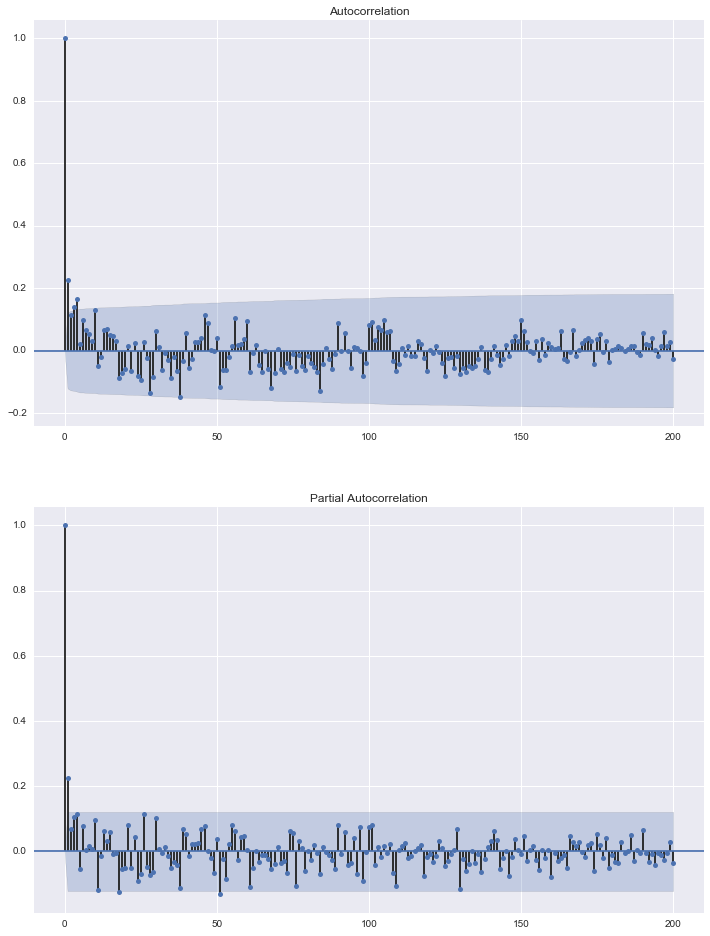

In [22]:
lags=200
fig = plt.figure(figsize=(12,16))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(weekly_ts, lags=lags, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(weekly_ts, lags=lags, ax=ax2)